<a href="https://colab.research.google.com/github/JessieDimples2006/South/blob/New-Branch2/J_A_Capstone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Agriculture and Vertical Growth***
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Objective: To analyze the data found on FAO to discover if we can sustain production of key resources for an ever-growing population, while we are losing land to commercial and residential zone's to compensate for the worlds growing population.

This analysis is useful to every person in the industry. From, Stakeholders, to Farmer's to the people working in the Field. We can all gain insight.

For this analysis we will be using data that can be found at the FAO website. 
In today's world there are 4 countries that are the top producers for the world’s food. (2) These countries are: The United States of America, China, Brazil, and India. We will be using the two largest producers of the world’s food supply, China and The United States of America.

We currently produce enough food for 10 billion people. Yet worldwide each year we waste 1/3 of all food produced for human consumption. (1) Which includes 45% of all Fruits and Vegetables, 35% of fish and seafood, 30% of cereals, 20% of all dairy products and 20% of all meat. Which equates to 1.3 billion tons and comes to an estimated total of $1 Trillion dollars.



# ***Agriculture Facts***
-------------------------------------------------------------------------------
Land that was previously used for crop production, is now being used for commercial and residential purposes. The Agriculture industry is having to come up with innovitive ways to circumvent the issue. Is it working?
Can we support the worlds ever increasing population?

Agriculture in America

As it stands right now 10% of the worlds arable land is in America. As it stands right now for the US, only 17% of our land is ideal for farming, yet we are losing 9.5 acres every minute (3).  From 1992-2012 a total amount of 11 million acres, was developed for either residential or commercial purposes.

Agriculture in China

China faces its own problems in the industry. In 2017 China's arable land fell to 134.86 million hectares. Of availabe arable land in China only 1.2% of it supports crop life. China has to feed nearly a quarter of the worlds population, with only 7% of it available land able to be used.
China has around 3.33 million acres that was deemed to polluted to grow crops, and another 10 million hectares that are contaminated by heavy meatals.


##*Import Information and declaring Data Frames*

Library Import

In [ ]:
import pandas as pd
import math
from scipy import stats
import seaborn as sns 
sns.set()

Mount Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Read Excel Sheets into seperate DataFrames

In [ ]:
eggs = pd.read_excel(r'/content/gdrive/MyDrive/School Work/China_USA_2.xlsx',
                     sheet_name = 'Eggs')
crops = pd.read_excel(r'/content/gdrive/MyDrive/School Work/China_USA_2.xlsx',
                      sheet_name = 'Crops')
meats = pd.read_excel(r'/content/gdrive/MyDrive/School Work/China_USA_2.xlsx',
                      sheet_name = 'Meats')
population = pd.read_excel(r'/content/gdrive/MyDrive/School Work/China_USA_2.xlsx', 
                           sheet_name = 'Population')
prices = pd.read_excel(r'/content/gdrive/MyDrive/School Work/China_USA_2.xlsx',
                       sheet_name = 'Producer_Prices')
yields = pd.read_excel(r'/content/gdrive/MyDrive/School Work/China_USA_2.xlsx',
                       sheet_name = 'Yields')
area = pd.read_excel(r'/content/gdrive/MyDrive/School Work/China_USA_2.xlsx',
                       sheet_name = 'Area')
milk = pd.read_excel(r'/content/gdrive/MyDrive/School Work/China_USA_2.xlsx',
                       sheet_name = 'Milk')
cereal = pd.read_excel(r'/content/gdrive/MyDrive/School Work/China_USA_2.xlsx',
                       sheet_name = 'Cereal')

In [ ]:
eggs_df = pd.DataFrame(eggs)
population_df = pd.DataFrame(population)
meats_df = pd.DataFrame(meats)
crops_df = pd.DataFrame(crops)
yields_df = pd.DataFrame(yields)
area_df = pd.DataFrame(area)
prices_df = pd.DataFrame(prices)
milk_df = pd.DataFrame(milk)
cereal_df = pd.DataFrame(cereal)

##*Functions*
----------------------------------------------------------------------------------------------------------------------------------------------------------------
*_Functions That will be called throughout the notebook._*

In [ ]:
def descript_df(array):
  s = array.shape,
  i = array.info(),
  d = array.describe(),
  e = array. isnull().sum(),
  return s , i , d , e

In [ ]:
def descript_col(array):
  d = array.describe(),
  e = array.isnull()
  return d,e

In [ ]:
def get_ci(array1, array2):
  description1 = array1.describe()
  description2 = array2.describe()
  results = stats.ttest_ind(array1, array2)
  sample_1_size = array1.count()
  sample_2_size = array2.count()
  sample_1_mean = array1.mean()
  sample_2_mean =array2.mean()
  sample_1_var = array1.var()
  sample_2_var = array2.var()
  mean_diff = sample_2_mean - sample_1_mean
  std_error = math.sqrt((sample_1_var/sample_1_size)+ (sample_2_var/sample_2_size))
  con_in = 1.96*std_error
  lower_ci = mean_diff - con_in
  upper_ci = mean_diff + con_in
  return("Descriptive Stats for the USA are:",
         "{}".format(description1),
         "The descriptive stats for China are:",
         "{}".format(description2),                                  
         "The count for USA : " + str(sample_1_size),
         "The count for China " + str(sample_2_size),
         "The mean for the USA is " + str(sample_1_mean),
         "The mean for China is  " + str(sample_2_mean),
         "The Variance for the USA is  " + str(sample_1_var),
         "The Variance for China is " + str(sample_2_var),
         "The Mean difference is: " + str(mean_diff),
         "The Standard Error of Difference is: " + str(std_error),
         "The Confidence interval is: " +  str(con_in),
         "The lower and upper parameters for the mean are: " + str(lower_ci) + ' '  + str(upper_ci),
         "The difference in means is at the 95% Confidence level, and (two-tail) is between " + str(lower_ci) + " and " + str(upper_ci))

In [ ]:
def get_info(array1):
  description1 = array1.describe()
  sample_1_size = array1.count()
  sample_1_mean = array1.mean()
  sample_1_var = array1.var()
  std_error = math.sqrt(sample_1_var/sample_1_size)
  return  (sample_1_size,
           sample_1_var,
           sample_1_mean,
           description1)

In [ ]:
def test(array, array2):
  x = stats.ttest_ind(array, array2)
  return x

In [ ]:
def linegraph(array1, array1y, array2, array2y):
  x = sns.lineplot(y=array1, x=array1y),
  b = sns.lineplot(y = array2, x=array2y)
  return x, b

In [ ]:
def disgraph(array, array2):
  x = sns.histplot(array),
  y = sns.histplot(array2)
  return x, y

In [ ]:
def scatter(array, array2, array3, array4):
  x = sns.scatterplot(y = array, x = array2)
  y = sns.scatterplot(y= array3, x = array4)
  return x, y

In [ ]:
def hisgraph(array):
  x = sns.histplot(array)
  return x

In [ ]:
def box(varray, yarray,cvarray,cyarray):
  a = sns.boxplot(y=varray, x= yarray)
  b = sns.boxplot(y=cvarray, x=cyarray)
  return a , b

#***Population*** 
--------------------------------------------------------------------------------
The world's population is a contrbuting factor for the need to develop land that was used for crop production. It's also a contributing factor to pollution, and a whole slew of other issues. 
But is the driving force for the need to circumvent decreasing quality land available for production of necessary resources.
Lets take a look at population's for China and the USA. 

Each single value is equal to 1,000.
1:1,000

##*Population*
-------------------------------------------------------------------------------
Population Hypothesis:

Null Hypothesis: The mean's are equal.

Alternative Hypothesis: The mean's are not equal.


In [ ]:
descript_df(population_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   US.pop.Element  58 non-null     object 
 1   US.pop.Year     58 non-null     int64  
 2   US.pop.Value    58 non-null     float64
 3   C.pop.Element   58 non-null     object 
 4   C.pop.Year      58 non-null     int64  
 5   C.pop.Value     58 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.8+ KB


(((58, 6),),
 (None,),
 (       US.pop.Year   US.pop.Value   C.pop.Year    C.pop.Value
  count    58.000000      58.000000    58.000000      58.000000
  mean   2004.000000  145659.561086  2004.000000  669587.322086
  std       8.439672   88437.524603     8.439672  163465.211512
  min    1990.000000   57980.034000  1990.000000  329576.683000
  25%    1997.000000   59276.792500  1997.000000  568827.823500
  50%    2004.000000  126264.975000  2004.000000  695209.849000
  75%    2011.000000  232692.851500  2011.000000  815498.939000
  max    2018.000000  268786.714000  2018.000000  871217.580000,),
 (US.pop.Element    0
  US.pop.Year       0
  US.pop.Value      0
  C.pop.Element     0
  C.pop.Year        0
  C.pop.Value       0
  dtype: int64,))

In [ ]:
descript_col(population_df['US.pop.Value'])

((count        58.000000
  mean     145659.561086
  std       88437.524603
  min       57980.034000
  25%       59276.792500
  50%      126264.975000
  75%      232692.851500
  max      268786.714000
  Name: US.pop.Value, dtype: float64,), 0     False
 1     False
 2     False
 3     False
 4     False
 5     False
 6     False
 7     False
 8     False
 9     False
 10    False
 11    False
 12    False
 13    False
 14    False
 15    False
 16    False
 17    False
 18    False
 19    False
 20    False
 21    False
 22    False
 23    False
 24    False
 25    False
 26    False
 27    False
 28    False
 29    False
 30    False
 31    False
 32    False
 33    False
 34    False
 35    False
 36    False
 37    False
 38    False
 39    False
 40    False
 41    False
 42    False
 43    False
 44    False
 45    False
 46    False
 47    False
 48    False
 49    False
 50    False
 51    False
 52    False
 53    False
 54    False
 55    False
 56    False
 57    False
 Name: 

In [ ]:
descript_col(population_df['C.pop.Value'])

((count        58.000000
  mean     669587.322086
  std      163465.211512
  min      329576.683000
  25%      568827.823500
  50%      695209.849000
  75%      815498.939000
  max      871217.580000
  Name: C.pop.Value, dtype: float64,), 0     False
 1     False
 2     False
 3     False
 4     False
 5     False
 6     False
 7     False
 8     False
 9     False
 10    False
 11    False
 12    False
 13    False
 14    False
 15    False
 16    False
 17    False
 18    False
 19    False
 20    False
 21    False
 22    False
 23    False
 24    False
 25    False
 26    False
 27    False
 28    False
 29    False
 30    False
 31    False
 32    False
 33    False
 34    False
 35    False
 36    False
 37    False
 38    False
 39    False
 40    False
 41    False
 42    False
 43    False
 44    False
 45    False
 46    False
 47    False
 48    False
 49    False
 50    False
 51    False
 52    False
 53    False
 54    False
 55    False
 56    False
 57    False
 Name: C

##*Population Results*

In [ ]:
test((population_df.dropna()['US.pop.Value']), (population_df.dropna()['C.pop.Value']))

Ttest_indResult(statistic=-21.46897055765619, pvalue=7.34008808278279e-42)

We reject the Null hypothesis, as expected, we can expect the population's to continue to grow. we can expect to see differences with even more extreme numbers. China leads the US for population totals and is expected to continue to do so. 
In 2019 China's population was reported to contribute to the world's total population by 18.9%, with an astonishing amount od 1,433,783,686. While the United States came in with a controbution of 4.3% of the worlds population. With a reported total of 329,064,917.(4)

In [ ]:
#@title
get_ci(population_df['US.pop.Value'], population_df['C.pop.Value'])

('Descriptive Stats for the USA are:',
 'count        58.000000\nmean     145659.561086\nstd       88437.524603\nmin       57980.034000\n25%       59276.792500\n50%      126264.975000\n75%      232692.851500\nmax      268786.714000\nName: US.pop.Value, dtype: float64',
 'The descriptive stats for China are:',
 'count        58.000000\nmean     669587.322086\nstd      163465.211512\nmin      329576.683000\n25%      568827.823500\n50%      695209.849000\n75%      815498.939000\nmax      871217.580000\nName: C.pop.Value, dtype: float64',
 'The count for USA : 58',
 'The count for China 58',
 'The mean for the USA is 145659.5610862069',
 'The mean for China is  669587.3220862069',
 'The Variance for the USA is  7821195757.972724',
 'The Variance for China is 26720875374.706528',
 'The Mean difference is: 523927.76099999994',
 'The Standard Error of Difference is: 24403.953584684496',
 'The Confidence interval is: 47831.74902598161',
 'The lower and upper parameters for the mean are: 476096

##*Graphs*
--------------------------------------------------------------------------------
Population Data Frame

((<matplotlib.axes._subplots.AxesSubplot at 0x7f0a745f91d0>,),
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0a745f91d0>)

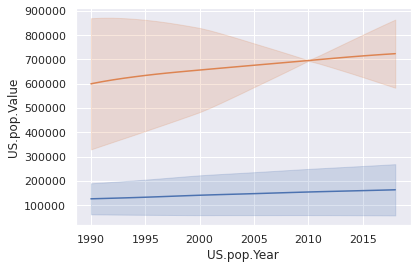

In [ ]:
linegraph(population_df['US.pop.Value'],population_df['US.pop.Year'], population_df['C.pop.Value'], population_df['C.pop.Year'])

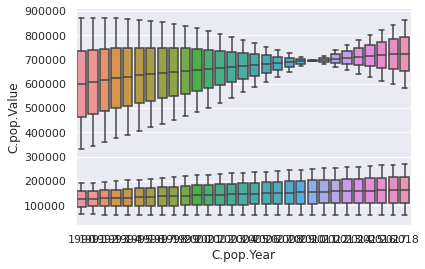

In [ ]:
sns.boxplot(y=population_df['US.pop.Value'], x=population_df['US.pop.Year'])
sns.boxplot(y=population_df['C.pop.Value'], x=population_df['C.pop.Year'])

#**Animal By-Product Yields**
--------------------------------------------------------------------------------
Summary of animal by-products produced in China and the United States of America.
Animal by-products, is defined by the USDA, as "products harvested or manufactured from livestock other than muscle meat  for instance, wool, and eggs.
With China and the USA being some of the largest producers of eggs, and with China being one of the worlds top 8 countries that have a high annual average of egg consumption per person. Japan is the leader, with an annual average for one person at 320 eggs.  

*_Egg Production Hypothesis:_*
--------------------------------------------------------------------------------

*_Null hypothesis:_* The mean for egg yield, is equal.

*_Alternative hypothesis:_* The mean for egg yield is not equal.

_For this analysis, we are going to take a look at the number of eggs produced in both the US and China. Eggs are a source of protein and a food that is seen for breakfast, lunch and dinner around the world._ 



In [ ]:
descript_df(eggs_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US Egg Yield  59 non-null     object
 1   Bird Type.US  59 non-null     object
 2   Year.Egg.US   59 non-null     int64 
 3   Value.Egg.US  59 non-null     int64 
 4   China Eggs    59 non-null     object
 5   Bird Type.C   59 non-null     object
 6   Year.Egg.C    59 non-null     int64 
 7   Value.Egg.C   59 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 3.8+ KB


(((59, 8),),
 (None,),
 (       Year.Egg.US   Value.Egg.US   Year.Egg.C    Value.Egg.C
  count    59.000000      59.000000    59.000000      59.000000
  mean   1990.000000  146654.881356  1990.000000   71313.237288
  std      17.175564   11858.335203    17.175564   30143.105891
  min    1961.000000  124612.000000  1961.000000   30371.000000
  25%    1975.500000  137909.000000  1975.500000   37077.500000
  50%    1990.000000  148886.000000  1990.000000   84748.000000
  75%    2004.500000  154677.500000  2004.500000   96375.000000
  max    2019.000000  167814.000000  2019.000000  135414.000000,),
 (US Egg Yield    0
  Bird Type.US    0
  Year.Egg.US     0
  Value.Egg.US    0
  China Eggs      0
  Bird Type.C     0
  Year.Egg.C      0
  Value.Egg.C     0
  dtype: int64,))

In [ ]:
descript_col(eggs_df['Value.Egg.US'])

((count        59.000000
  mean     146654.881356
  std       11858.335203
  min      124612.000000
  25%      137909.000000
  50%      148886.000000
  75%      154677.500000
  max      167814.000000
  Name: Value.Egg.US, dtype: float64,), 0     False
 1     False
 2     False
 3     False
 4     False
 5     False
 6     False
 7     False
 8     False
 9     False
 10    False
 11    False
 12    False
 13    False
 14    False
 15    False
 16    False
 17    False
 18    False
 19    False
 20    False
 21    False
 22    False
 23    False
 24    False
 25    False
 26    False
 27    False
 28    False
 29    False
 30    False
 31    False
 32    False
 33    False
 34    False
 35    False
 36    False
 37    False
 38    False
 39    False
 40    False
 41    False
 42    False
 43    False
 44    False
 45    False
 46    False
 47    False
 48    False
 49    False
 50    False
 51    False
 52    False
 53    False
 54    False
 55    False
 56    False
 57    False
 58    

In [ ]:
descript_col(eggs_df['Value.Egg.C'])

((count        59.000000
  mean      71313.237288
  std       30143.105891
  min       30371.000000
  25%       37077.500000
  50%       84748.000000
  75%       96375.000000
  max      135414.000000
  Name: Value.Egg.C, dtype: float64,), 0     False
 1     False
 2     False
 3     False
 4     False
 5     False
 6     False
 7     False
 8     False
 9     False
 10    False
 11    False
 12    False
 13    False
 14    False
 15    False
 16    False
 17    False
 18    False
 19    False
 20    False
 21    False
 22    False
 23    False
 24    False
 25    False
 26    False
 27    False
 28    False
 29    False
 30    False
 31    False
 32    False
 33    False
 34    False
 35    False
 36    False
 37    False
 38    False
 39    False
 40    False
 41    False
 42    False
 43    False
 44    False
 45    False
 46    False
 47    False
 48    False
 49    False
 50    False
 51    False
 52    False
 53    False
 54    False
 55    False
 56    False
 57    False
 58    F

##*Results*

T-Test

In [ ]:
test(eggs_df['Value.Egg.US'], eggs_df['Value.Egg.C'])

Ttest_indResult(statistic=17.865960969317417, pvalue=4.263834601128711e-35)

We reject the Null hypothesis. There is a signficant difference in the mean's. We would see even more extreme difference in mean's if we included all the countries. 

In [ ]:
get_ci(eggs_df['Value.Egg.US'], eggs_df['Value.Egg.C'])

('Descriptive Stats for the USA are:',
 'count        59.000000\nmean     146654.881356\nstd       11858.335203\nmin      124612.000000\n25%      137909.000000\n50%      148886.000000\n75%      154677.500000\nmax      167814.000000\nName: Value.Egg.US, dtype: float64',
 'The descriptive stats for China are:',
 'count        59.000000\nmean      71313.237288\nstd       30143.105891\nmin       30371.000000\n25%       37077.500000\n50%       84748.000000\n75%       96375.000000\nmax      135414.000000\nName: Value.Egg.C, dtype: float64',
 'The count for USA : 59',
 'The count for China 59',
 'The mean for the USA is 146654.88135593222',
 'The mean for China is  71313.2372881356',
 'The Variance for the USA is  140620113.79602566',
 'The Variance for China is 908606832.7703102',
 'The Mean difference is: -75341.64406779662',
 'The Standard Error of Difference is: 4217.049628463121',
 'The Confidence interval is: 8265.417271787717',
 'The lower and upper parameters for the mean are: -83607.

##***Graphs***
*Egg Yield*

((<matplotlib.axes._subplots.AxesSubplot at 0x7f0a744a8390>,),
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0a744a8390>)

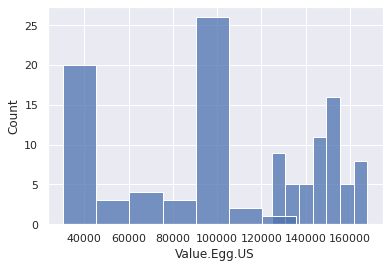

In [ ]:
disgraph(eggs_df['Value.Egg.US'],eggs_df['Value.Egg.C'])

((<matplotlib.axes._subplots.AxesSubplot at 0x7f0a73f3f5f8>,),
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0a73f3f5f8>)

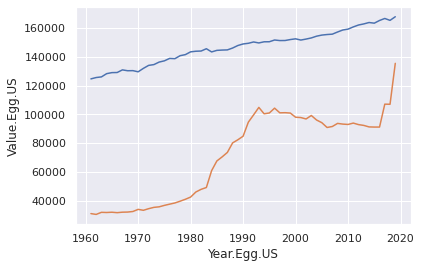

In [ ]:
linegraph(eggs_df['Value.Egg.US'], eggs_df['Year.Egg.US'], eggs_df['Value.Egg.C'], eggs_df['Year.Egg.C'])

Population and Egg Production 

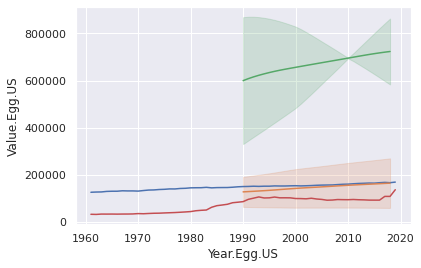

In [ ]:
sns.lineplot(y=eggs_df['Value.Egg.US'], x= eggs_df['Year.Egg.US'])
sns.lineplot(y= population_df['US.pop.Value'], x = population_df['US.pop.Year'])
sns.lineplot(y=population_df['C.pop.Value'], x=population_df['C.pop.Year'])
sns.lineplot(y= eggs_df['Value.Egg.C'], x=eggs_df['Year.Egg.C'])

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0a73f12278>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0a73f12278>)

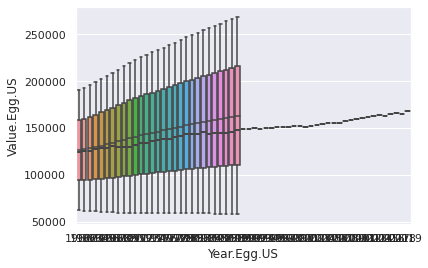

In [ ]:
box(population_df['US.pop.Value'],  population_df['US.pop.Year'], eggs_df['Value.Egg.US'], eggs_df['Year.Egg.US'])

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0a73754f28>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0a73754f28>)

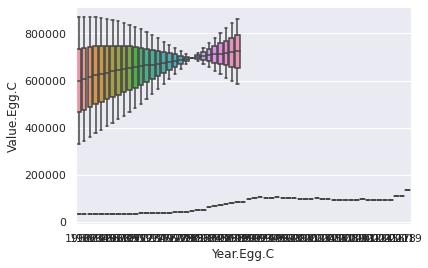

In [ ]:
box(population_df['C.pop.Value'],  population_df['C.pop.Year'], eggs_df['Value.Egg.C'], eggs_df['Year.Egg.C'])

#**Meats**
--------------------------------------------------------------------------------
Now we will examine meat totals for the USA and China. For an ever-growing economy meat production should increase.
With China and the USA being top meat producer’s, we should not be able to reject the null hypothesis, as we are comparing top meat  producers in the world. 
In 2019 China produced around 90,000,000 metric tons of meat, followed by the United States who produced 48,000,000 metric tons of meat.  

##*Meat for Human Consumption*


---


*Null Hypothesis:* The means for each country are equal.

*Alternative Hypothesis:* The means are not equal.


 
                                                     
*This total represents the number of animals slaughtered for human consumption*


In [ ]:
descript_df(meats_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   US.Meat          442 non-null    object 
 1   Meat type        442 non-null    object 
 2   Year.M.US        442 non-null    float64
 3   Value.Meat.US    442 non-null    float64
 4   China Meat       796 non-null    object 
 5   Meat Type China  796 non-null    object 
 6   Year.M.C         796 non-null    int64  
 7   Value.M.C        796 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 49.9+ KB


(((796, 8),),
 (None,),
 (         Year.M.US  Value.Meat.US     Year.M.C     Value.M.C
  count   442.000000   4.420000e+02   796.000000  7.960000e+02
  mean   1990.984163   1.937654e+07  1990.543970  3.834104e+07
  std      17.029845   3.244804e+07    17.050036  1.124346e+08
  min    1961.000000   9.344000e+03  1961.000000  1.600000e+02
  25%    1976.000000   1.217362e+05  1976.000000  1.859275e+05
  50%    1992.000000   2.540400e+06  1991.000000  7.987600e+05
  75%    2006.000000   3.374562e+07  2005.000000  9.162082e+06
  max    2019.000000   1.299890e+08  2019.000000  7.449179e+08,),
 (US.Meat            354
  Meat type          354
  Year.M.US          354
  Value.Meat.US      354
  China Meat           0
  Meat Type China      0
  Year.M.C             0
  Value.M.C            0
  dtype: int64,))

In [ ]:
descript_col(meats_df['Value.Meat.US'])

((count    4.420000e+02
  mean     1.937654e+07
  std      3.244804e+07
  min      9.344000e+03
  25%      1.217362e+05
  50%      2.540400e+06
  75%      3.374562e+07
  max      1.299890e+08
  Name: Value.Meat.US, dtype: float64,), 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 791     True
 792     True
 793     True
 794     True
 795     True
 Name: Value.Meat.US, Length: 796, dtype: bool)

In [ ]:
descript_col(meats_df['Value.M.C'])

((count    7.960000e+02
  mean     3.834104e+07
  std      1.124346e+08
  min      1.600000e+02
  25%      1.859275e+05
  50%      7.987600e+05
  75%      9.162082e+06
  max      7.449179e+08
  Name: Value.M.C, dtype: float64,), 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 791    False
 792    False
 793    False
 794    False
 795    False
 Name: Value.M.C, Length: 796, dtype: bool)

##*Results*
------------------------------------------------------------
*Meat Data Frame*


In [ ]:
test(meats_df.dropna()['Value.Meat.US'], meats_df.dropna()['Value.M.C'])

Ttest_indResult(statistic=3.5576389475724883, pvalue=0.0003941491856008898)

With a P-Value of .0003, We reject the null hypothesis with a P-value less than .05, there is a signficant difference in the means. 

In [ ]:
get_ci(meats_df.dropna()['Value.Meat.US'], meats_df.dropna()['Value.M.C'])

('Descriptive Stats for the USA are:',
 'count    4.420000e+02\nmean     1.937654e+07\nstd      3.244804e+07\nmin      9.344000e+03\n25%      1.217362e+05\n50%      2.540400e+06\n75%      3.374562e+07\nmax      1.299890e+08\nName: Value.Meat.US, dtype: float64',
 'The descriptive stats for China are:',
 'count    4.420000e+02\nmean     1.192981e+07\nstd      2.972680e+07\nmin      1.710000e+02\n25%      2.595402e+05\n50%      1.502824e+06\n75%      5.530777e+06\nmax      1.627604e+08\nName: Value.M.C, dtype: float64',
 'The count for USA : 442',
 'The count for China 442',
 'The mean for the USA is 19376543.477375567',
 'The mean for China is  11929807.13122172',
 'The Variance for the USA is  1052875039611601.4',
 'The Variance for China is 883682846198667.8',
 'The Mean difference is: -7446736.346153848',
 'The Standard Error of Difference is: 2093168.097126617',
 'The Confidence interval is: 4102609.4703681692',
 'The lower and upper parameters for the mean are: -11549345.816522017 

##*Graphs*
--------------------------------------------------------------------------------
*Meat Data Frame*

Meats over time with China being represented with an orange line and the US with the blue line

((<matplotlib.axes._subplots.AxesSubplot at 0x7f0a730248d0>,),
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0a730248d0>)

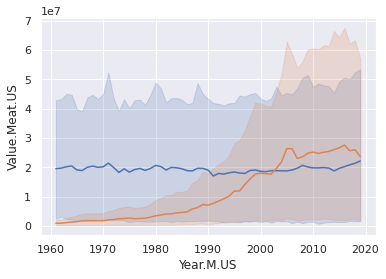

In [ ]:
linegraph(meats_df.dropna()['Value.Meat.US'], meats_df.dropna()['Year.M.US'],meats_df.dropna()['Value.M.C'],meats_df.dropna()['Year.M.C'])

#***Land Use***
--------------------------------------------------------------------------------
With the ever-increasing population, our available amount of land is declining. Land is being rezoned, for either commercial or residential use. Soil is being contaminated or rezoned.


As of 2018 the USA loses 9.5 acres of farmland every minute. With China on the verge of losing millions of hectares of arable land due to heavy metal pollution. The world faces many problem's when producing our resources.
We still need to produce enough food for our growing population. Can we do this even though we are losing farmland.


By using vertical farming, which is defined as "the practice of growing produce in vertically stacked layers. The practice can use soil, hydroponic or aeroponic growing methods. Vertical farms attempt to produce food in challenging environments, like where arable land is rare or unavailable. (5) without vertical farming we already produce enough food for 10 Billion people, but due to waste, we cannot feed 10 billion people.
 


##*Farm Land*
--------------------------------------------------------------------------------
*Null Hypothesis:* The means are equal

*Alternative Hypothesis:* The means are not equal.

Summary amount of Area, used for crop production


In [ ]:
descript_df(area_df)

NameError: ignored

In [ ]:
descript_col(area_df['US.Area.Value'])

((count    4.876000e+03
  mean     1.199620e+06
  std      4.838270e+06
  min      1.500000e+01
  25%      1.210525e+04
  50%      4.253650e+04
  75%      1.758025e+05
  max      3.623675e+07
  Name: US.Area.Value, dtype: float64,), 0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 6329     True
 6330     True
 6331     True
 6332     True
 6333     True
 Name: US.Area.Value, Length: 6334, dtype: bool)

In [ ]:
descript_col(area_df['C.Area.Value'])

((count    6.334000e+03
  mean     1.423797e+06
  std      4.746721e+06
  min      1.200000e+01
  25%      1.491000e+04
  50%      1.257075e+05
  75%      7.038960e+05
  max      4.499575e+07
  Name: C.Area.Value, dtype: float64,), 0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 6329    False
 6330    False
 6331    False
 6332    False
 6333    False
 Name: C.Area.Value, Length: 6334, dtype: bool)

##*Results*
--------------------------------------------------------------------------------
_Farm Land Area_

In [ ]:
test(area_df.dropna()['US.Area.Value'], area_df.dropna()['C.Area.Value'])

Ttest_indResult(statistic=0.9474748348953389, pvalue=0.3434203551702739)

We fail to reject the Null hypothesis. with a P-Value greater than .05. the difference in means is not signficant.

In [ ]:
get_ci(area_df.dropna()['US.Area.Value'], area_df.dropna()['C.Area.Value'])

('Descriptive Stats for the USA are:',
 'count    4.876000e+03\nmean     1.199620e+06\nstd      4.838270e+06\nmin      1.500000e+01\n25%      1.210525e+04\n50%      4.253650e+04\n75%      1.758025e+05\nmax      3.623675e+07\nName: US.Area.Value, dtype: float64',
 'The descriptive stats for China are:',
 'count    4.876000e+03\nmean     1.110478e+06\nstd      4.444424e+06\nmin      1.200000e+01\n25%      1.200000e+04\n50%      7.592450e+04\n75%      4.762912e+05\nmax      4.499575e+07\nName: C.Area.Value, dtype: float64',
 'The count for USA : 4876',
 'The count for China 4876',
 'The mean for the USA is 1199620.3271123872',
 'The mean for China is  1110477.6993437244',
 'The Variance for the USA is  23408855856819.66',
 'The Variance for China is 19752908921033.457',
 'The Mean difference is: -89142.62776866276',
 'The Standard Error of Difference is: 94084.42787666203',
 'The Confidence interval is: 184405.47863825757',
 'The lower and upper parameters for the mean are: -273548.106406

##*Graphs*
--------------------------------------------------------------------------------
Land used for Farm Production

((<matplotlib.axes._subplots.AxesSubplot at 0x7f0a72edc4a8>,),
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0a72edc4a8>)

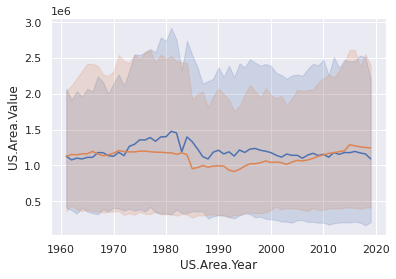

In [ ]:
linegraph(area_df.dropna()['US.Area.Value'], area_df.dropna()['US.Area.Year'],area_df.dropna()['C.Area.Value'], area_df.dropna()['C.Area.Year'])

#***Crops Production***
--------------------------------------------------------------------------------
Crop Production is defined as the process of growing crops for domestic and commercial purposes. 

Crop production is related to harvested areas, returns per hectare and quantities produced. our data here relates to crops grown mainly for human consumption.

Crop production is measured in tonnes per hectare, in thousand hectares and thousand tonnes. 

##*Production*
--------------------------------------------------------------------------------


*Crop Data Frame*


In [ ]:
crops_df.head()

,US.Crop.Pro.Year,US.Crop.Pro.Element,US.Crop.Pro.Item,US.Crop.Pro.Value,C.Crop.Pro.Year,US.Crop.Pro.Element.1,C.Crop.Pro.Item,C.Crop.Pro.Value
0,1961.0,Production,"Almonds, with shell",60237.0,1985,Production,"Almonds, with shell",5000
1,1962.0,Production,"Almonds, with shell",43545.0,1986,Production,"Almonds, with shell",5500
2,1963.0,Production,"Almonds, with shell",54159.0,1987,Production,"Almonds, with shell",5800
3,1964.0,Production,"Almonds, with shell",68042.0,1988,Production,"Almonds, with shell",6500
4,1965.0,Production,"Almonds, with shell",66133.0,1989,Production,"Almonds, with shell",7500


In [ ]:
descript_df(crops_df.dropna())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5054 entries, 0 to 5053
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   US.Crop.Pro.Year       5054 non-null   float64
 1   US.Crop.Pro.Element    5054 non-null   object 
 2   US.Crop.Pro.Item       5054 non-null   object 
 3   US.Crop.Pro.Value      5054 non-null   float64
 4   C.Crop.Pro.Year        5054 non-null   int64  
 5   US.Crop.Pro.Element.1  5054 non-null   object 
 6   C.Crop.Pro.Item        5054 non-null   object 
 7   C.Crop.Pro.Value       5054 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 355.4+ KB


(((5054, 8),),
 (None,),
 (       US.Crop.Pro.Year  US.Crop.Pro.Value  C.Crop.Pro.Year  C.Crop.Pro.Value
  count       5054.000000       5.054000e+03      5054.000000      5.054000e+03
  mean        1990.484369       5.985441e+06      1992.366047      6.725597e+06
  std           17.056015       2.661224e+07        16.823520      2.490837e+07
  min         1961.000000       4.000000e+01      1961.000000      4.000000e+01
  25%         1976.000000       5.267875e+04      1978.000000      3.249800e+04
  50%         1991.000000       3.572160e+05      1994.000000      3.502245e+05
  75%         2005.000000       1.639324e+06      2007.000000      2.575332e+06
  max         2019.000000       4.122622e+08      2019.000000      2.651573e+08,),
 (US.Crop.Pro.Year         0
  US.Crop.Pro.Element      0
  US.Crop.Pro.Item         0
  US.Crop.Pro.Value        0
  C.Crop.Pro.Year          0
  US.Crop.Pro.Element.1    0
  C.Crop.Pro.Item          0
  C.Crop.Pro.Value         0
  dtype: int64,))

In [ ]:
descript_col(crops_df.dropna()['US.Crop.Pro.Value'])

((count    5.054000e+03
  mean     5.985441e+06
  std      2.661224e+07
  min      4.000000e+01
  25%      5.267875e+04
  50%      3.572160e+05
  75%      1.639324e+06
  max      4.122622e+08
  Name: US.Crop.Pro.Value, dtype: float64,), 0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 5049    False
 5050    False
 5051    False
 5052    False
 5053    False
 Name: US.Crop.Pro.Value, Length: 5054, dtype: bool)

In [ ]:
descript_col(crops_df.dropna()['C.Crop.Pro.Value'])

((count    5.054000e+03
  mean     6.725597e+06
  std      2.490837e+07
  min      4.000000e+01
  25%      3.249800e+04
  50%      3.502245e+05
  75%      2.575332e+06
  max      2.651573e+08
  Name: C.Crop.Pro.Value, dtype: float64,), 0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 5049    False
 5050    False
 5051    False
 5052    False
 5053    False
 Name: C.Crop.Pro.Value, Length: 5054, dtype: bool)

##*Results*
--------------------------------------------------------------------------------
*Crop Production Data Frame*

In [ ]:
test(crops_df.dropna()['US.Crop.Pro.Value'], crops_df.dropna()['C.Crop.Pro.Value'])

Ttest_indResult(statistic=-1.4435692961072892, pvalue=0.1488911636723133)

We fail to reject the null hypothesis. With a P-Value greater than .05, there is currently not a signficant difference in the means. 

In [ ]:
get_ci(crops_df.dropna()['US.Crop.Pro.Value'], crops_df.dropna()['C.Crop.Pro.Value'])

('Descriptive Stats for the USA are:',
 'count    5.054000e+03\nmean     5.985441e+06\nstd      2.661224e+07\nmin      4.000000e+01\n25%      5.267875e+04\n50%      3.572160e+05\n75%      1.639324e+06\nmax      4.122622e+08\nName: US.Crop.Pro.Value, dtype: float64',
 'The descriptive stats for China are:',
 'count    5.054000e+03\nmean     6.725597e+06\nstd      2.490837e+07\nmin      4.000000e+01\n25%      3.249800e+04\n50%      3.502245e+05\n75%      2.575332e+06\nmax      2.651573e+08\nName: C.Crop.Pro.Value, dtype: float64',
 'The count for USA : 5054',
 'The count for China 5054',
 'The mean for the USA is 5985440.52374357',
 'The mean for China is  6725596.84962406',
 'The Variance for the USA is  708211544305268.5',
 'The Variance for China is 620427086281861.2',
 'The Mean difference is: 740156.3258804902',
 'The Standard Error of Difference is: 512726.5645482943',
 'The Confidence interval is: 1004944.0665146568',
 'The lower and upper parameters for the mean are: -264787.7406

##*Production Graphs*
--------------------------------------------------------------------------------
*Crop Production*

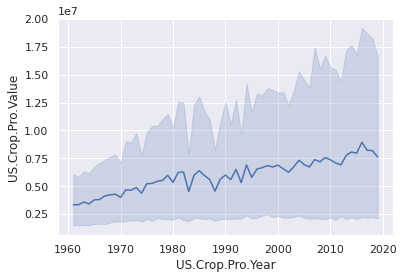

In [ ]:
sns.lineplot(y=crops_df.dropna()['US.Crop.Pro.Value'], x = crops_df.dropna()['US.Crop.Pro.Year'])

((<matplotlib.axes._subplots.AxesSubplot at 0x7f0a72e247b8>,),
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0a72e247b8>)

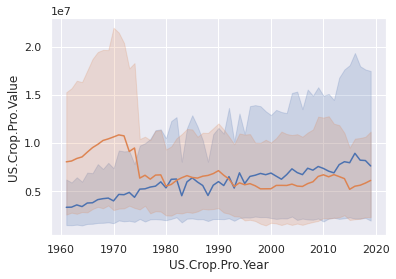

In [ ]:
linegraph(crops_df.dropna()['US.Crop.Pro.Value'], crops_df.dropna()['US.Crop.Pro.Year'],crops_df.dropna()['C.Crop.Pro.Value'], crops_df.dropna()['C.Crop.Pro.Year'])

#***Crop Yield***
--------------------------------------------------------------------------------
 Crop yields are the harvested production per unit of harvested area for crop products

##***Yields Data Frame***
--------------------------------------------------------------------------------
*Crop Yields*


In [ ]:
descript_df(yields_df.dropna())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4876 entries, 0 to 4875
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   US.Yield.Item   4876 non-null   object 
 1   US.Yield.Year   4876 non-null   float64
 2   US.Yield.Value  4876 non-null   float64
 3   C.Yield.Item    4876 non-null   object 
 4   C.Yield.Year    4876 non-null   int64  
 5   C.Yield.Value   4876 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 266.7+ KB


(((4876, 6),),
 (None,),
 (       US.Yield.Year  US.Yield.Value  C.Yield.Year  C.Yield.Value
  count    4876.000000     4876.000000   4876.000000   4.876000e+03
  mean     1990.732158   145036.146226   1992.266407   1.019896e+05
  std        17.010031   162484.003853     16.755355   2.272016e+05
  min      1961.000000     2867.000000   1961.000000   1.884000e+03
  25%      1976.000000    24386.000000   1978.000000   1.767250e+04
  50%      1991.000000    86607.000000   1994.000000   4.615400e+04
  75%      2005.000000   207166.250000   2007.000000   1.240105e+05
  max      2019.000000   993693.000000   2019.000000   3.077380e+06,),
 (US.Yield.Item     0
  US.Yield.Year     0
  US.Yield.Value    0
  C.Yield.Item      0
  C.Yield.Year      0
  C.Yield.Value     0
  dtype: int64,))

In [ ]:
descript_col(yields.dropna()['US.Yield.Value'])

((count      4876.000000
  mean     145036.146226
  std      162484.003853
  min        2867.000000
  25%       24386.000000
  50%       86607.000000
  75%      207166.250000
  max      993693.000000
  Name: US.Yield.Value, dtype: float64,), 0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 4871    False
 4872    False
 4873    False
 4874    False
 4875    False
 Name: US.Yield.Value, Length: 4876, dtype: bool)

In [ ]:
descript_col(yields.dropna()['C.Yield.Value'])

((count    4.876000e+03
  mean     1.019896e+05
  std      2.272016e+05
  min      1.884000e+03
  25%      1.767250e+04
  50%      4.615400e+04
  75%      1.240105e+05
  max      3.077380e+06
  Name: C.Yield.Value, dtype: float64,), 0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 4871    False
 4872    False
 4873    False
 4874    False
 4875    False
 Name: C.Yield.Value, Length: 4876, dtype: bool)

In [ ]:
yields_df.dropna()

,US.Yield.Item,US.Yield.Year,US.Yield.Value,C.Yield.Item,C.Yield.Year,C.Yield.Value
0,"Almonds, with shell",1961.0,16669.0,"Almonds, with shell",1985,16883
1,"Almonds, with shell",1962.0,11558.0,"Almonds, with shell",1986,16867
2,"Almonds, with shell",1963.0,13684.0,"Almonds, with shell",1987,16854
3,"Almonds, with shell",1964.0,16517.0,"Almonds, with shell",1988,16860
4,"Almonds, with shell",1965.0,13932.0,"Almonds, with shell",1989,17021
...,...,...,...,...,...,...
4871,Wheat,2015.0,29299.0,Safflower seed,1996,18824
4872,Wheat,2016.0,35408.0,Safflower seed,1997,11905
4873,Wheat,2017.0,31175.0,Safflower seed,1998,20833
4874,Wheat,2018.0,32005.0,Safflower seed,1999,8000


##*Results*

In [ ]:
test(yields_df.dropna()['US.Yield.Value'], yields_df.dropna()['C.Yield.Value'])

Ttest_indResult(statistic=10.76125413634921, pvalue=7.421250573295371e-27)

We Reject the null hypothesis. With a p-value less than .05, there is a signficant difference in the means.

In [ ]:
get_ci(yields_df.dropna()['US.Yield.Value'], yields_df.dropna()['C.Yield.Value'])

('Descriptive Stats for the USA are:',
 'count      4876.000000\nmean     145036.146226\nstd      162484.003853\nmin        2867.000000\n25%       24386.000000\n50%       86607.000000\n75%      207166.250000\nmax      993693.000000\nName: US.Yield.Value, dtype: float64',
 'The descriptive stats for China are:',
 'count    4.876000e+03\nmean     1.019896e+05\nstd      2.272016e+05\nmin      1.884000e+03\n25%      1.767250e+04\n50%      4.615400e+04\n75%      1.240105e+05\nmax      3.077380e+06\nName: C.Yield.Value, dtype: float64',
 'The count for USA : 4876',
 'The count for China 4876',
 'The mean for the USA is 145036.1462264151',
 'The mean for China is  101989.58367514356',
 'The Variance for the USA is  26401051508.188026',
 'The Variance for China is 51620552641.60547',
 'The Mean difference is: -43046.562551271534',
 'The Standard Error of Difference is: 4000.1436640985416',
 'The Confidence interval is: 7840.281581633141',
 'The lower and upper parameters for the mean are: -508

##*Crop Yield Graph*
--------------------------------------------------------------------------------
*Crop Yield*

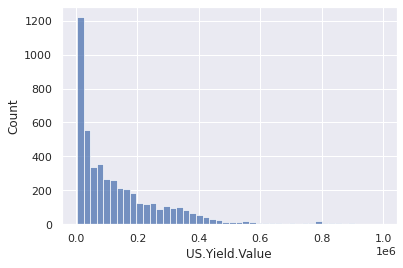

In [ ]:
hisgraph(yields_df.dropna()['US.Yield.Value'])


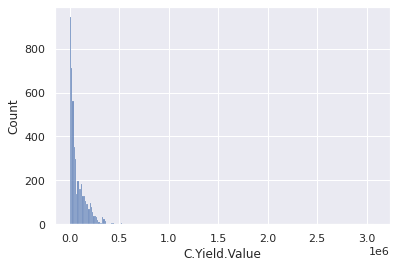

In [ ]:
hisgraph(yields_df.dropna()['C.Yield.Value'])

((<matplotlib.axes._subplots.AxesSubplot at 0x7f0a74856470>,),
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0a74856470>)

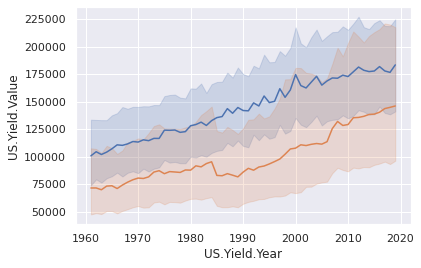

In [ ]:
linegraph(yields_df.dropna()['US.Yield.Value'], yields_df.dropna()['US.Yield.Year'], yields_df.dropna()['C.Yield.Value'], yields_df.dropna()['C.Yield.Year'])

#***Producer Prices***
--------------------------------------------------------------------------------
Producer Prices vary. But the US see's a higher producer price than china does. The United States also has a higher cost than China does.

## *Producer Prices*
--------------------------------------------------------------------------------
*Prices paid directly to the Farmer at the point of sale*

In [ ]:
descript_df(prices_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11841 entries, 0 to 11840
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Item.Pro.Prices.US  11841 non-null  object 
 1   Year.Pro.Price.US   11841 non-null  int64  
 2   Value               11841 non-null  float64
 3   C.Item.Pro.Prices   11408 non-null  object 
 4   C.Year.Pro.Prices   11408 non-null  float64
 5   C.Value.Pro.Prices  11408 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 555.2+ KB


(((11841, 6),),
 (None,),
 (       Year.Pro.Price.US         Value  C.Year.Pro.Prices  C.Value.Pro.Prices
  count       11841.000000  11841.000000       11408.000000        11408.000000
  mean         2007.890212   1053.069901        2008.839499         8352.035352
  std             8.093349   1895.220418           7.427055        12132.136302
  min          1991.000000      0.000000        1991.000000           17.900000
  25%          2001.000000    302.000000        2005.000000         1926.000000
  50%          2010.000000    597.000000        2011.000000         4031.900000
  75%          2015.000000   1246.000000        2014.000000         9568.000000
  max          2019.000000  44313.000000        2019.000000       167900.000000,),
 (Item.Pro.Prices.US      0
  Year.Pro.Price.US       0
  Value                   0
  C.Item.Pro.Prices     433
  C.Year.Pro.Prices     433
  C.Value.Pro.Prices    433
  dtype: int64,))

In [ ]:
descript_col(prices_df['Value'])

((count    11841.000000
  mean      1053.069901
  std       1895.220418
  min          0.000000
  25%        302.000000
  50%        597.000000
  75%       1246.000000
  max      44313.000000
  Name: Value, dtype: float64,), 0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 11836    False
 11837    False
 11838    False
 11839    False
 11840    False
 Name: Value, Length: 11841, dtype: bool)

In [ ]:
descript_col(prices_df['C.Value.Pro.Prices'])

((count     11408.000000
  mean       8352.035352
  std       12132.136302
  min          17.900000
  25%        1926.000000
  50%        4031.900000
  75%        9568.000000
  max      167900.000000
  Name: C.Value.Pro.Prices, dtype: float64,), 0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 11836     True
 11837     True
 11838     True
 11839     True
 11840     True
 Name: C.Value.Pro.Prices, Length: 11841, dtype: bool)

In [ ]:
prices.dropna()

,Item.Pro.Prices.US,Year.Pro.Price.US,Value,C.Item.Pro.Prices,C.Year.Pro.Prices,C.Value.Pro.Prices
0,"Almonds, with shell",1991,1571.0,Apples,1991.0,1469.0
1,Apples,1991,395.0,Bananas,1991.0,1464.0
2,Apricots,1991,407.0,Barley,1991.0,613.0
3,Avocados,1991,1319.0,"Beans, green",1991.0,878.0
4,Bananas,1991,904.0,"Broad beans, horse beans, dry",1991.0,878.0
...,...,...,...,...,...,...
11403,Rye,2014,305.0,"Tobacco, unmanufactured",2018.0,4183.9
11404,Safflower seed,2014,551.0,Tomatoes,2018.0,554.2
11405,Seed cotton,2014,856.0,Watermelons,2018.0,373.5
11406,Sorghum,2014,159.0,Wheat,2018.0,340.8


##*Results*
--------------------------------------------------------------------------------
*Producer Prices*

In [ ]:
get_ci(prices_df['Value'],prices_df['C.Value.Pro.Prices'])

('Descriptive Stats for the USA are:',
 'count    11841.000000\nmean      1053.069901\nstd       1895.220418\nmin          0.000000\n25%        302.000000\n50%        597.000000\n75%       1246.000000\nmax      44313.000000\nName: Value, dtype: float64',
 'The descriptive stats for China are:',
 'count     11408.000000\nmean       8352.035352\nstd       12132.136302\nmin          17.900000\n25%        1926.000000\n50%        4031.900000\n75%        9568.000000\nmax      167900.000000\nName: C.Value.Pro.Prices, dtype: float64',
 'The count for USA : 11841',
 'The count for China 11408',
 'The mean for the USA is 1053.069901190778',
 'The mean for China is  8352.035352384311',
 'The Variance for the USA is  3591860.432697026',
 'The Variance for China is 147188731.2420875',
 'The Mean difference is: 7298.965451193533',
 'The Standard Error of Difference is: 114.91552977160855',
 'The Confidence interval is: 225.23443835235275',
 'The lower and upper parameters for the mean are: 7073.7310

In [ ]:
test(prices_df.dropna()['Value'],prices_df.dropna()['C.Value.Pro.Prices'])

Ttest_indResult(statistic=-63.87169896630455, pvalue=0.0)

##*Producer Prices Graph*
--------------------------------------------------------------------------------
*Producer Prices*

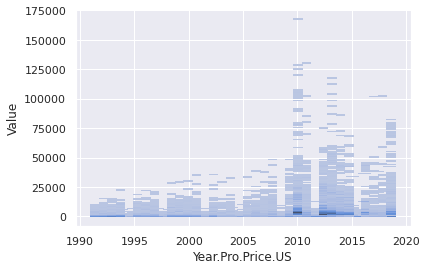

In [ ]:
sns.histplot(y = prices_df.dropna()['Value'], x = prices.dropna()['Year.Pro.Price.US'])
sns.histplot(y = prices_df.dropna()['C.Value.Pro.Prices'], x = prices_df.dropna()['C.Year.Pro.Prices'])

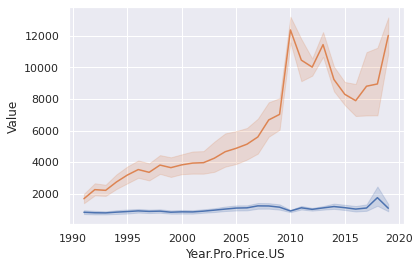

In [ ]:
sns.lineplot(y = prices_df.dropna()['Value'], x = prices.dropna()['Year.Pro.Price.US'])
sns.lineplot(y = prices_df.dropna()['C.Value.Pro.Prices'], x = prices_df.dropna()['C.Year.Pro.Prices'])

#***Milk Totals***
--------------------------------------------------------------------------------
Currently China ranks seecond in terms of global dairy sales revenue, after the United States of America and is forecasted to overtake the US by 2022.

## *Milk*
--------------------------------------------------------------------------------
*Milk yield after being processed*

In [ ]:
descript_df(milk_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   US Milk Yield     88 non-null     object 
 1   Milk Animal.US    88 non-null     object 
 2   Year.US.milk      88 non-null     int64  
 3   Value.US.Milk     88 non-null     int64  
 4   China Milk Yield  59 non-null     object 
 5   Milk Animal.C     59 non-null     object 
 6   Year.M.C          59 non-null     float64
 7   Value.Milk.China  59 non-null     float64
dtypes: float64(2), int64(2), object(4)
memory usage: 5.6+ KB


(((88, 8),),
 (None,),
 (       Year.US.milk  Value.US.Milk     Year.M.C  Value.Milk.China
  count     88.000000      88.000000    59.000000         59.000000
  mean    1994.943182   46150.113636  1990.000000      19650.983051
  std       16.440319   36677.035328    17.175564       9069.480549
  min     1961.000000     936.000000  1961.000000      11624.000000
  25%     1982.750000    1061.750000  1975.500000      13149.500000
  50%     1997.500000   48202.000000  1990.000000      15837.000000
  75%     2008.250000   76882.250000  2004.500000      25250.500000
  max     2019.000000  105904.000000  2019.000000      56468.000000,),
 (US Milk Yield        0
  Milk Animal.US       0
  Year.US.milk         0
  Value.US.Milk        0
  China Milk Yield    29
  Milk Animal.C       29
  Year.M.C            29
  Value.Milk.China    29
  dtype: int64,))

In [ ]:
descript_col(milk_df.dropna()['Value.US.Milk'])

((count        59.000000
  mean      68332.542373
  std       22336.357438
  min       33068.000000
  25%       48202.000000
  50%       67052.000000
  75%       87340.500000
  max      105904.000000
  Name: Value.US.Milk, dtype: float64,), 0     False
 1     False
 2     False
 3     False
 4     False
 5     False
 6     False
 7     False
 8     False
 9     False
 10    False
 11    False
 12    False
 13    False
 14    False
 15    False
 16    False
 17    False
 18    False
 19    False
 20    False
 21    False
 22    False
 23    False
 24    False
 25    False
 26    False
 27    False
 28    False
 29    False
 30    False
 31    False
 32    False
 33    False
 34    False
 35    False
 36    False
 37    False
 38    False
 39    False
 40    False
 41    False
 42    False
 43    False
 44    False
 45    False
 46    False
 47    False
 48    False
 49    False
 50    False
 51    False
 52    False
 53    False
 54    False
 55    False
 56    False
 57    False
 58   

In [ ]:
descript_col(milk_df.dropna()['Value.Milk.China'])

((count       59.000000
  mean     19650.983051
  std       9069.480549
  min      11624.000000
  25%      13149.500000
  50%      15837.000000
  75%      25250.500000
  max      56468.000000
  Name: Value.Milk.China, dtype: float64,), 0     False
 1     False
 2     False
 3     False
 4     False
 5     False
 6     False
 7     False
 8     False
 9     False
 10    False
 11    False
 12    False
 13    False
 14    False
 15    False
 16    False
 17    False
 18    False
 19    False
 20    False
 21    False
 22    False
 23    False
 24    False
 25    False
 26    False
 27    False
 28    False
 29    False
 30    False
 31    False
 32    False
 33    False
 34    False
 35    False
 36    False
 37    False
 38    False
 39    False
 40    False
 41    False
 42    False
 43    False
 44    False
 45    False
 46    False
 47    False
 48    False
 49    False
 50    False
 51    False
 52    False
 53    False
 54    False
 55    False
 56    False
 57    False
 58    Fals

##*Milk Results*
--------------------------------------------------------------------------------
*Milk Data Frame*

In [ ]:
test(milk_df.dropna()['Value.US.Milk'], milk_df.dropna()['Value.Milk.China'])

Ttest_indResult(statistic=15.510989805634873, pvalue=4.6255014038833875e-30)

We reject the null hypothesis, with a P-Value less than .05. We can expect to see even more extreme mean differences using the world's data.

In [ ]:
get_ci(milk_df.dropna()['Value.US.Milk'], milk_df.dropna()['Value.Milk.China'])

('Descriptive Stats for the USA are:',
 'count        59.000000\nmean      68332.542373\nstd       22336.357438\nmin       33068.000000\n25%       48202.000000\n50%       67052.000000\n75%       87340.500000\nmax      105904.000000\nName: Value.US.Milk, dtype: float64',
 'The descriptive stats for China are:',
 'count       59.000000\nmean     19650.983051\nstd       9069.480549\nmin      11624.000000\n25%      13149.500000\n50%      15837.000000\n75%      25250.500000\nmax      56468.000000\nName: Value.Milk.China, dtype: float64',
 'The count for USA : 59',
 'The count for China 59',
 'The mean for the USA is 68332.54237288136',
 'The mean for China is  19650.98305084746',
 'The Variance for the USA is  498912863.5973117',
 'The Variance for China is 82255477.43074226',
 'The Mean difference is: -48681.55932203391',
 'The Standard Error of Difference is: 3138.520489798063',
 'The Confidence interval is: 6151.500160004203',
 'The lower and upper parameters for the mean are: -54833.059

## *Milk Graphs*

((<matplotlib.axes._subplots.AxesSubplot at 0x7f0a72ccccc0>,),
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0a72ccccc0>)

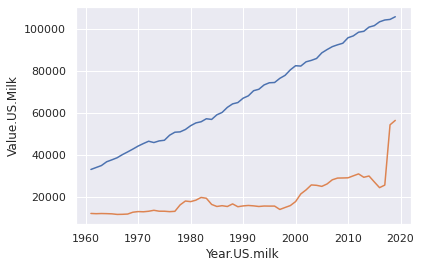

In [ ]:
linegraph(milk_df.dropna()['Value.US.Milk'],milk_df['Year.US.milk'], milk_df.dropna()['Value.Milk.China'],milk_df['Year.M.C'])

# Summary
--------------------------------------------------------------------------------
 By analyzing the data for the top producing countries, we can see the difference in certain areas. But we can also see some areas appear to stay the same. 
 As we already produce enough food for the projected estimates for the worlds growing population, I think that continuing with vertical farming is the way to go. From the analysis it shows that even though we are losing land our production is not decreasing, and that is due to vertical farming. So far, the agriculture industry has found ways to circumvent the loss of land. 

 Part of the problem with our food supply, is related to waste. The United States alone, waste more food than what Africa imports each year. To help put that into perspective, it is between 30-40% of the US Food supply, which is 80 billion pounds of food and equates to $161 Billion dollars each year that is wasted.

My recommendation are as follows, continue with vertical farming, as it can do nothing but help. Find ways to remedy the soil pollution, to reclaim some of our arable land. 
